In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(rc = {'figure.figsize':(12,7)})

In [3]:
df = pd.read_csv('./data/monday.csv', delimiter = ';')

In [4]:
df.head()

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices


### Calculate the total number of customers in each section

In [5]:
x = df.groupby('location')[['customer_no']].count()

In [6]:
x

,customer_no
location,
checkout,1437
dairy,895
drinks,797
fruit,1005
spices,750


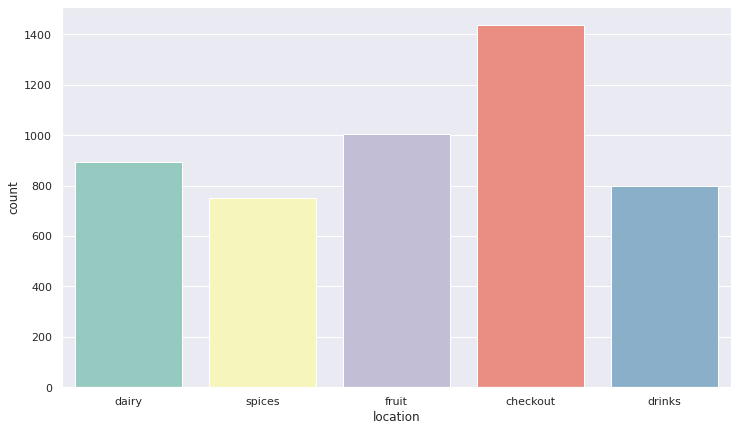

In [7]:
sns.countplot(x = 'location', data =df, palette = 'Set3')

### Calculate the total number of customers in each section over time

In [8]:
df['timestamp']=pd.to_datetime(df['timestamp'])
df['timestamp']

0      2019-09-02 07:03:00
1      2019-09-02 07:03:00
2      2019-09-02 07:04:00
3      2019-09-02 07:04:00
4      2019-09-02 07:04:00
               ...        
4879   2019-09-02 21:49:00
4880   2019-09-02 21:49:00
4881   2019-09-02 21:49:00
4882   2019-09-02 21:50:00
4883   2019-09-02 21:50:00
Name: timestamp, Length: 4884, dtype: datetime64[ns]

In [9]:
y = df.groupby(['location',pd.Grouper(key = 'timestamp',freq='1H')])

In [10]:
y_new = y.count().unstack(level = 0)

In [11]:
y_new.columns 

MultiIndex([('customer_no', 'checkout'),
            ('customer_no',    'dairy'),
            ('customer_no',   'drinks'),
            ('customer_no',    'fruit'),
            ('customer_no',   'spices')],
           names=[None, 'location'])

In [12]:
y_new.columns = y_new.columns.droplevel(0)
y_new = y_new.reset_index()

y_new.columns

Index(['timestamp', 'checkout', 'dairy', 'drinks', 'fruit', 'spices'], dtype='object', name='location')

In [13]:
y_new

location,timestamp,checkout,dairy,drinks,fruit,spices
0,2019-09-02 07:00:00,92,59,60,54,52
1,2019-09-02 08:00:00,112,68,65,68,51
2,2019-09-02 09:00:00,85,50,57,76,40
3,2019-09-02 10:00:00,90,58,35,47,52
4,2019-09-02 11:00:00,55,36,24,41,33
5,2019-09-02 12:00:00,73,55,37,54,46
6,2019-09-02 13:00:00,120,76,50,95,71
7,2019-09-02 14:00:00,90,58,43,64,50
8,2019-09-02 15:00:00,94,67,48,79,54
9,2019-09-02 16:00:00,86,49,54,66,52


### Display the number of customers at checkout over time

In [14]:
#y_new['checkout'].plot()
#y_new['dairy'].plot()
#y_new['drinks'].plot()
#y_new['fruit'].plot()
#y_new['spices'].plot()

In [15]:
#y_new['timestamp'].dt.hour

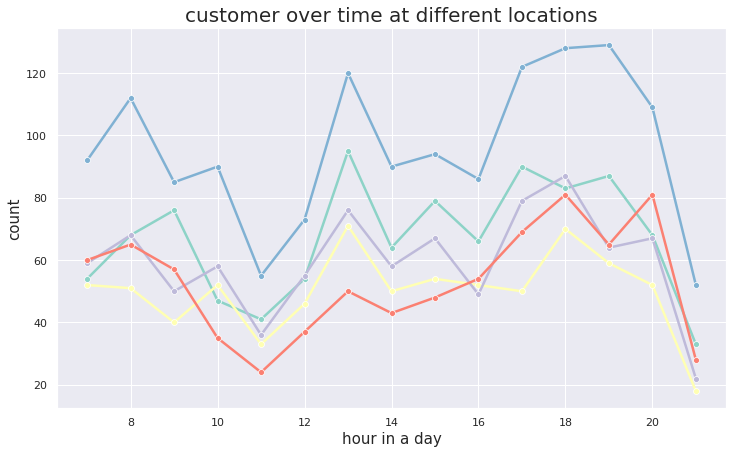

In [16]:
sns.set_palette("Set3")
sns.lineplot(x=y_new['timestamp'].dt.hour, y=y_new['fruit'], marker='o', linewidth=2.5)
sns.lineplot(x=y_new['timestamp'].dt.hour, y=y_new['spices'], marker='o', linewidth=2.5)
sns.lineplot(x=y_new['timestamp'].dt.hour, y=y_new['dairy'], marker='o', linewidth=2.5)
sns.lineplot(x=y_new['timestamp'].dt.hour, y=y_new['drinks'], marker='o', linewidth=2.5)
sns.lineplot(x=y_new['timestamp'].dt.hour, y=y_new['checkout'], marker='o', linewidth=2.5)

plt.title("customer over time at different locations", fontsize = 20) # for title
plt.xlabel("hour in a day", fontsize = 15) # label for x-axis
plt.ylabel("count", fontsize = 15) # label for y-axis
plt.show()

### Calculate the time each customer spent in the market

In [17]:
difference=df.groupby('customer_no')[['timestamp']].agg(lambda x: x.max() - x.min())


In [18]:
difference

,timestamp
customer_no,
1,00:02:00
2,00:03:00
3,00:02:00
4,00:04:00
5,00:01:00
...,...
1443,00:01:00
1444,00:01:00
1445,00:00:00


### Calculate the total number of customers in the supermarket over time.

In [19]:
y_new['total_overtime'] = y_new['fruit']+ y_new['dairy']+ y_new['spices'] + y_new['drinks']

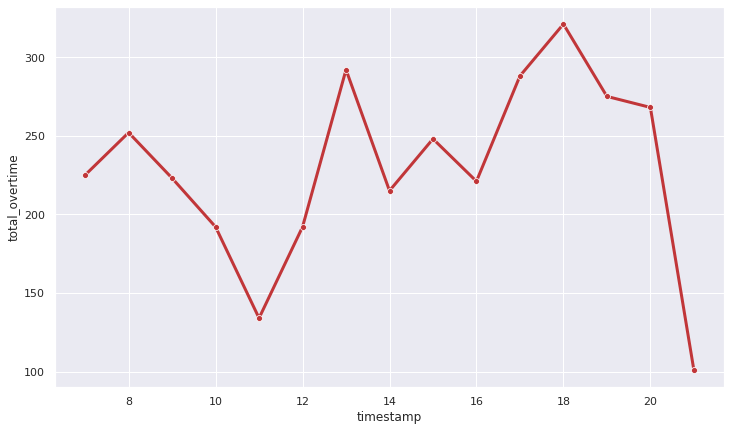

In [20]:
sns.set_palette("RdBu")
sns.lineplot(x=y_new['timestamp'].dt.hour, y=y_new['total_overtime'], marker='o', linewidth=3)


### Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).

In [31]:
entrance_first = df.sort_values('timestamp').groupby('customer_no').first()

In [52]:
entrance_first

,timestamp,location
customer_no,,
1,2019-09-02 07:03:00,dairy
2,2019-09-02 07:03:00,dairy
3,2019-09-02 07:04:00,dairy
4,2019-09-02 07:04:00,dairy
5,2019-09-02 07:04:00,spices
...,...,...
1443,2019-09-02 21:47:00,fruit
1444,2019-09-02 21:48:00,spices
1445,2019-09-02 21:49:00,dairy


In [59]:
entrance_first_count = entrance_first.groupby(['location',pd.Grouper(key = 'timestamp',freq='1H')])

In [61]:
k = entrance_first_count.count().unstack(level = 0)

In [62]:
k

timestamp
2019-09-02 07:00:00
2019-09-02 08:00:00
2019-09-02 09:00:00
2019-09-02 10:00:00
2019-09-02 11:00:00
2019-09-02 12:00:00
2019-09-02 13:00:00
2019-09-02 14:00:00
2019-09-02 15:00:00
2019-09-02 16:00:00


In [57]:
k.columns = k.columns.droplevel(0)
k = k.reset_index()

In [58]:
k

location,timestamp
0,2019-09-02 07:00:00
1,2019-09-02 08:00:00
2,2019-09-02 09:00:00
3,2019-09-02 10:00:00
4,2019-09-02 11:00:00
5,2019-09-02 12:00:00
6,2019-09-02 13:00:00
7,2019-09-02 14:00:00
8,2019-09-02 15:00:00
9,2019-09-02 16:00:00


In [41]:
entrance_new = df.groupby('customer_no').apply(pd.DataFrame.sort_values, 'timestamp')

In [50]:
entrance_new.loc[entrance_new['customer_no'] == 6]


timestamp  customer_no  location
customer_no                                               
6           5   2019-09-02 07:04:00            6    spices
            10  2019-09-02 07:05:00            6     dairy
            62  2019-09-02 07:17:00            6    spices
            71  2019-09-02 07:18:00            6    drinks
            102 2019-09-02 07:25:00            6    spices
            104 2019-09-02 07:26:00            6     dairy
            117 2019-09-02 07:27:00            6    spices
            135 2019-09-02 07:29:00            6  checkout